## Importación de librerías :

In [71]:
import pandas as pd
import numpy as np

## Carga de archivos:

In [72]:
weather=pd.read_csv("weather.csv",delimiter=',')
rides=pd.read_csv("cab_rides.csv",delimiter=',')

## EDA:

In [73]:
print(weather.head())
print(rides.head())

    temp            location  clouds  pressure    rain  time_stamp  humidity  \
0  42.42            Back Bay     1.0   1012.14  0.1228  1545003901      0.77   
1  42.43         Beacon Hill     1.0   1012.15  0.1846  1545003901      0.76   
2  42.50   Boston University     1.0   1012.15  0.1089  1545003901      0.76   
3  42.11              Fenway     1.0   1012.13  0.0969  1545003901      0.77   
4  43.13  Financial District     1.0   1012.14  0.1786  1545003901      0.75   

    wind  
0  11.25  
1  11.32  
2  11.07  
3  11.09  
4  11.49  
   distance cab_type     time_stamp    destination            source  price  \
0      0.44     Lyft  1544952607890  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1543284023677  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1543366822198  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1543553582749  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1543463360223  North Station  Haymar

In [74]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [75]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [76]:
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [77]:
print(rides['time_stamp'].head())
print(weather['time_stamp'].head())


0    1544952607890
1    1543284023677
2    1543366822198
3    1543553582749
4    1543463360223
Name: time_stamp, dtype: int64
0    1545003901
1    1545003901
2    1545003901
3    1545003901
4    1545003901
Name: time_stamp, dtype: int64


Creamos la columna 'date_time' convirtiendo la columna 'time_stamp'.



In [78]:
rides['date_time'] = pd.to_datetime(rides['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


Ahora comprobamos si hay valores nulos:

In [79]:
rides.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,55095
surge_multiplier,0
id,0
product_id,0
name,0


Creamos una columna 'fecha' para unir las dos tablas:

In [80]:
rides['fecha'] = rides.source.astype(str) +" - "+ rides.date_time.dt.date.astype("str") +" - "+ rides.date_time.dt.hour.astype("str")
weather['fecha'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

Unimos las dos tablas; convertimos la tabla 'fecha' a índice para unirlas.

In [81]:
weather.index = weather['fecha']

df = rides.join(weather,on=['fecha'],rsuffix ='_w')

In [82]:
df.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,100909
surge_multiplier,0
id,0
product_id,0
name,0


Quitamos los valores nulos (también se podría añadirle un valor):

In [83]:
df=df.dropna(axis=0)

In [84]:
df.isnull().sum()

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,0
surge_multiplier,0
id,0
product_id,0
name,0


Añadimos columnas dia y hora para simplificar la fecha:

In [85]:
df['day'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour

Analizamos que columnas son las mas relevantes para la variable a predecir '**price'**

In [86]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns

df_encoded = df.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Columna '{col}' codificada")

Columna 'cab_type' codificada
Columna 'destination' codificada
Columna 'source' codificada
Columna 'id' codificada
Columna 'product_id' codificada
Columna 'name' codificada
Columna 'fecha' codificada
Columna 'location' codificada
Columna 'fecha_w' codificada


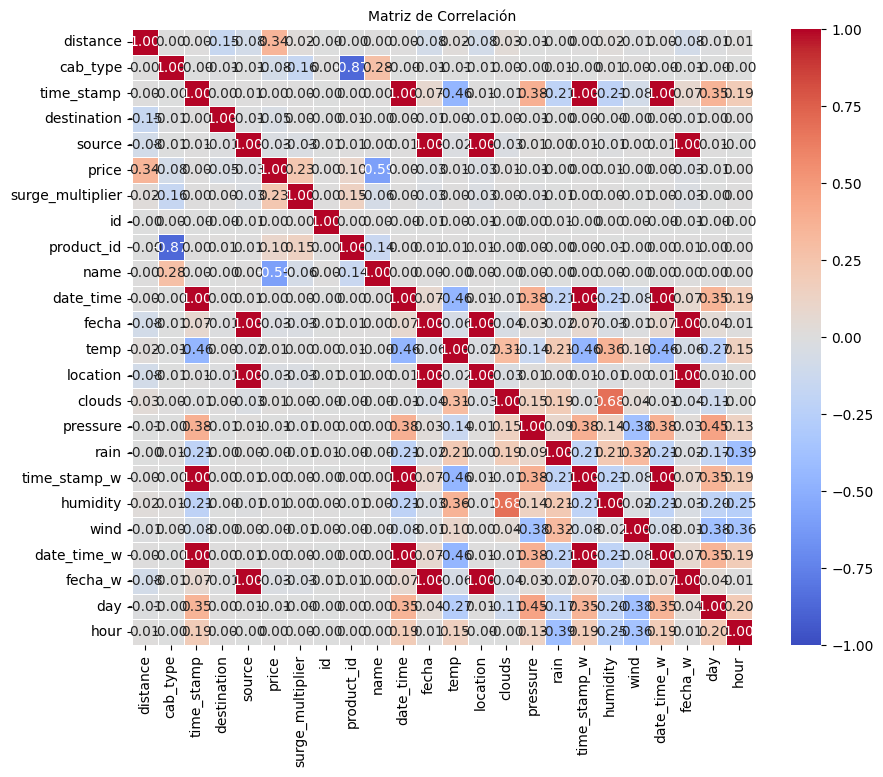

In [87]:
# Correlación
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación', fontsize=10)
plt.show()

No se saca nada claro en  la matriz de correlación debido a que hay demasiadas variables y para la columna 'price' no hay variables con clara correlación.
Por lo que para reducir el df seleccionamos las variabes que consideramos mas repesentativas.

In [88]:
y = df_encoded['price']

x = df_encoded.drop(columns=['price', 'time_stamp', 'date_time', 'time_stamp_w', 'date_time_w', 'id', 'fecha', 'fecha_w'])

# Update feature_list to reflect the columns in x
feature_list = list(x.columns)
print("Updated features for training:")
print(feature_list)

Updated features for training:
['distance', 'cab_type', 'destination', 'source', 'surge_multiplier', 'product_id', 'name', 'temp', 'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour']


In [89]:
feature_list=list(x.columns)
feature_list

['distance',
 'cab_type',
 'destination',
 'source',
 'surge_multiplier',
 'product_id',
 'name',
 'temp',
 'location',
 'clouds',
 'pressure',
 'rain',
 'humidity',
 'wind',
 'day',
 'hour']

## División en train y test:

In [90]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_jobs=-1, random_state = 42)

model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [92]:
y_pred=model.predict(x_test)

## Evaluación del modelo

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', round(mae, 2))

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', round(mse, 2))

# Calculate and print Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', round(rmse, 2))

# Calculate and print R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', round(r2, 2))


Mean Absolute Error: 1.02
Mean Squared Error: 2.86
Root Mean Squared Error: 1.69
R-squared Score: 0.97


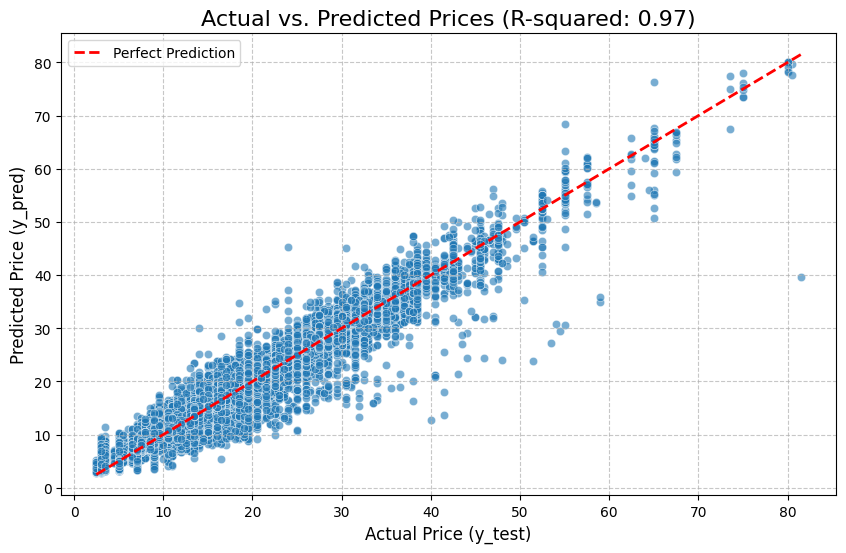

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot a perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.title(f'Actual vs. Predicted Prices (R-squared: {r2:.2f})', fontsize=16)
plt.xlabel('Actual Price (y_test)', fontsize=12)
plt.ylabel('Predicted Price (y_pred)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [98]:
y.describe()

,price
count,190311.000000
mean,16.518091
std,9.309931
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,92.000000


Viendo que el r^2 es de 0.97 y el MAE es de 1, teniendo en cuenta que el valor medio del precio es de 16.5 se puede confirmar que el modelo se comporta correctamente, tiene buena capacidad para generalizar y para hacer predicciones por lo que hemos hecho un buen moodelo.
